In [5]:
%config InlineBackend.figure_format = 'retina'

# Bars charts, pie charts, and heatmaps

Now that we have an understanding of the core components of plots, let's dive more deeply into bar charts and introduce two other common types of plots: pie charts and heat maps.

## Bar plots

We say bar plots earlier, but let's explore more variants of bar plots so that we can make stacked and grouped bar plots. To being with, let's create some data that we'll plot for this exercise that shows the output of grain, wheat and barley in tons, for three different farms.

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "Farm A": [50, 75, 36],
    "Farm B": [15, 98, 33],
    "Farm C": [0, 20, 77],
}
columns = ["Grain", "Wheat", "Barley"]

farm_data = pd.DataFrame.from_dict(data, orient="index", columns=columns)
farm_data

,Grain,Wheat,Barley
Farm A,50,75,36
Farm B,15,98,33
Farm C,0,20,77


### Standard bar plots

We can make bar plots in one of two directions: vertical or horizontal. We've already seen vertical bar plots, but lets revisit those by looking at the total grain, wheat, and barley output across the three farms.

In [7]:
total = farm_data.sum()
total

Grain      65
Wheat     193
Barley    146
dtype: int64

Text(0, 0.5, 'Quantity (Tons)')

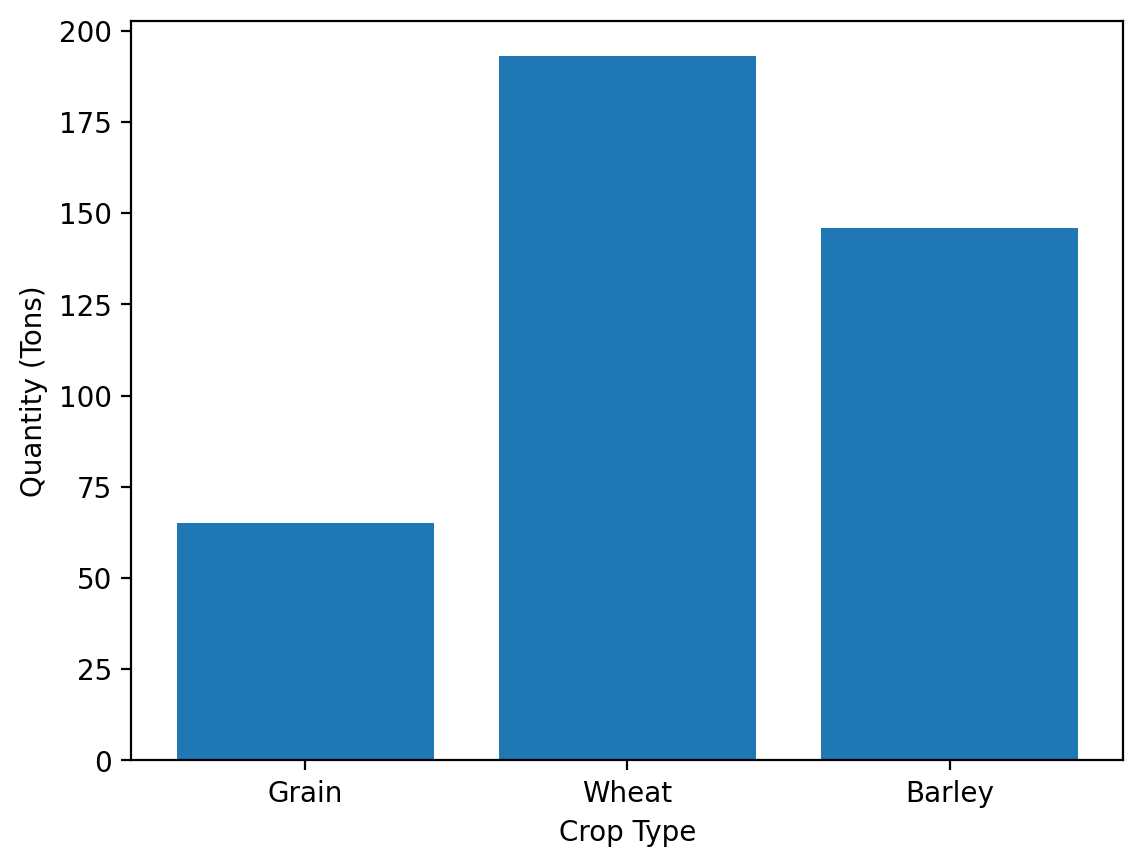

In [8]:
fig, ax = plt.subplots()

ax.bar(total.index,height=total.values)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')

Creating a horizontal bar plot instead is trivial using the `barh` command which just swaps the x and y axis.

Text(0, 0.5, 'Crop Type')

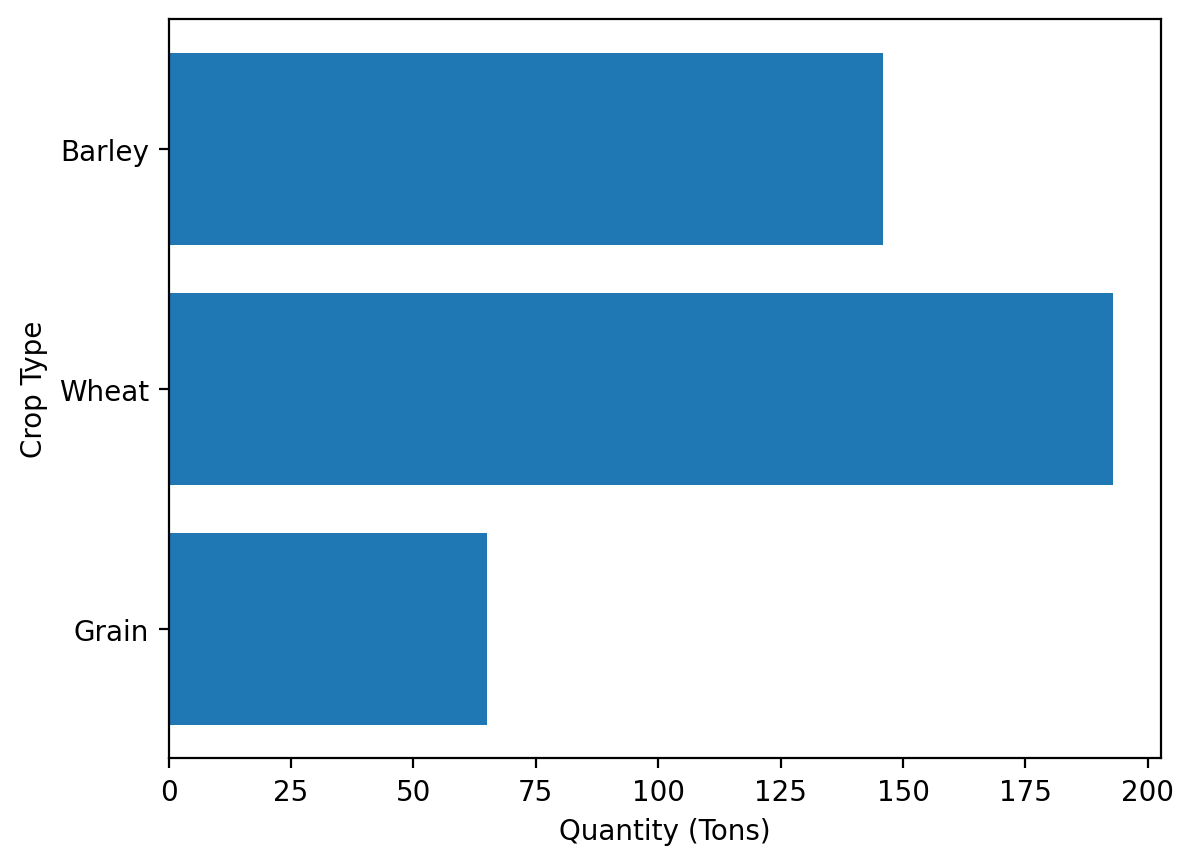

In [9]:
fig, ax = plt.subplots()

ax.barh(total.index,width=total.values)
ax.set_xlabel('Quantity (Tons)')
ax.set_ylabel('Crop Type')

### Stacked bar plots

Where this gets more interesting is when we want to create stacked bar plots. Each bar that's plotted is actually a rectangle and so it has a baseline which is 0 in standard bar plots. However, we can adjust that baseline through the `bottom` keyword parameter and that becomes the starting point for the bar. Let's set a different baseline for plotting the grain, wheat, and barley totals to show how that would look. You'll notice that the length of the bar plot remains the same, the value of the baseline has just been added to it. For example, for wheat, 50 was added to the plotted value of 193 which means the top of the bar was 243 - very close to 250 as is visible in the plot below:

Text(0, 0.5, 'Quantity (Tons)')

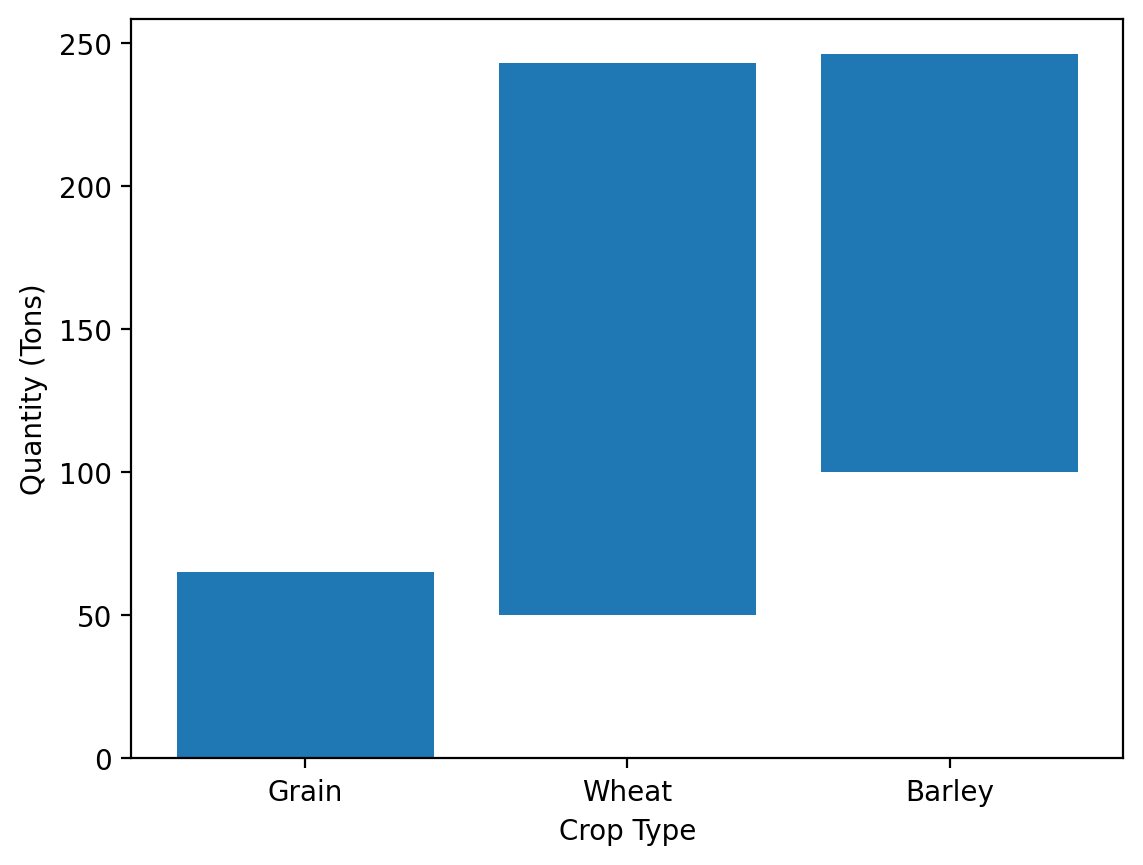

In [10]:
fig, ax = plt.subplots()

bottom = np.array([0,50,100])

ax.bar(total.index,height=total.values, bottom=bottom)
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')


Grain starts at 0, wheat at 50, and barley at 100. We can use this to make our stacked bar plot by plotting each element by adding it as a new set of bars. Let's start by plotting just one farm instead of the totals and we'll begin with Farm A.

Text(0, 0.5, 'Quantity (Tons)')

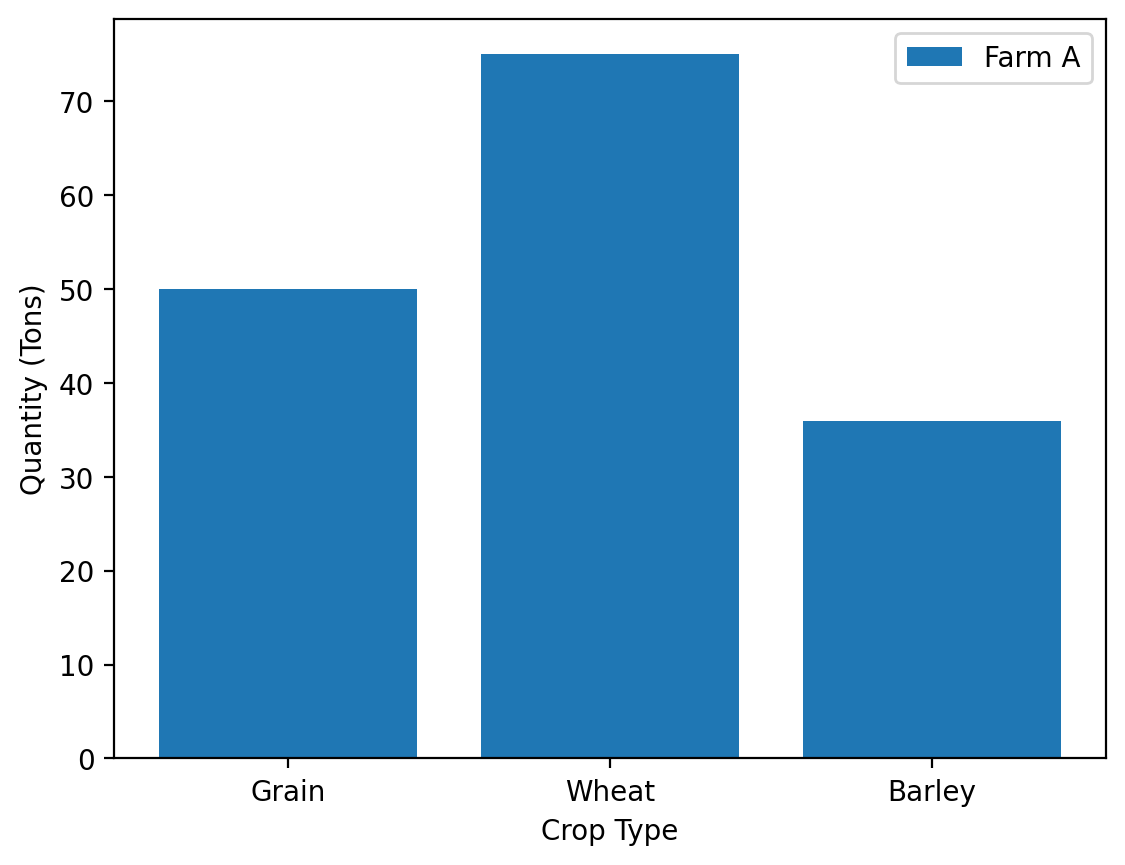

In [11]:
fig, ax = plt.subplots()

ax.bar(farm_data.columns,farm_data.loc['Farm A'].values, label='Farm A')

ax.legend()
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')

Now, to create the stacked items, we'll plot each part of the bar on top of these first sets of bars by resetting the baseline each time to the cumulative total of any previously plotted bars. Using this approach, let's iterate through each row of the `farm_data` DataFrame and plot it to make the stacked bar plot:

Text(0, 0.5, 'Quantity (Tons)')

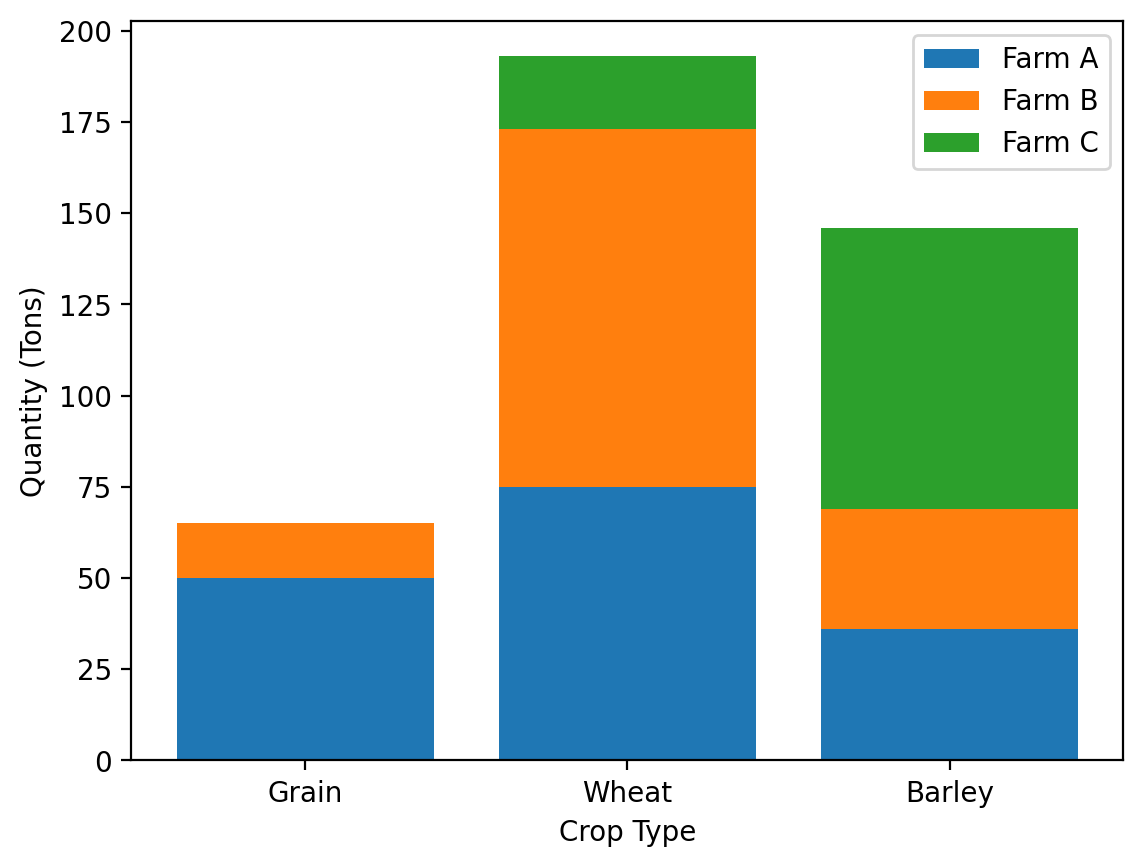

In [12]:
fig, ax = plt.subplots()

bottom = np.zeros(3) # Stores the current baseline of the bars to set as the baseline for the next set of bars

for farm_name, farm_crop_yields in farm_data.iterrows(): # Recall that for a DataFrame using the `iterrows()` method allows us to iterate over the rows of the DataFrame
    ax.bar(farm_crop_yields.index, farm_crop_yields.values, label=farm_name, bottom=bottom)
    # Note that here, farm_crop_yields.index is the farm name, farm_crop_yields.values is the crop yields for the current farm in the loop
    
    bottom += farm_crop_yields # Collects the total amounts of grain, wheat, and barley already accounted for and establishes the new baseline for the next farm to stack on the plot.

ax.legend()
ax.set_xlabel('Crop Type')
ax.set_ylabel('Quantity (Tons)')



### Grouped bar plots

Grouped bar plots require that we do a small amount of math to get them to work. Let's look at how we do this, then explain how it's made:

Text(0, 0.5, 'Quantity (Tons)')

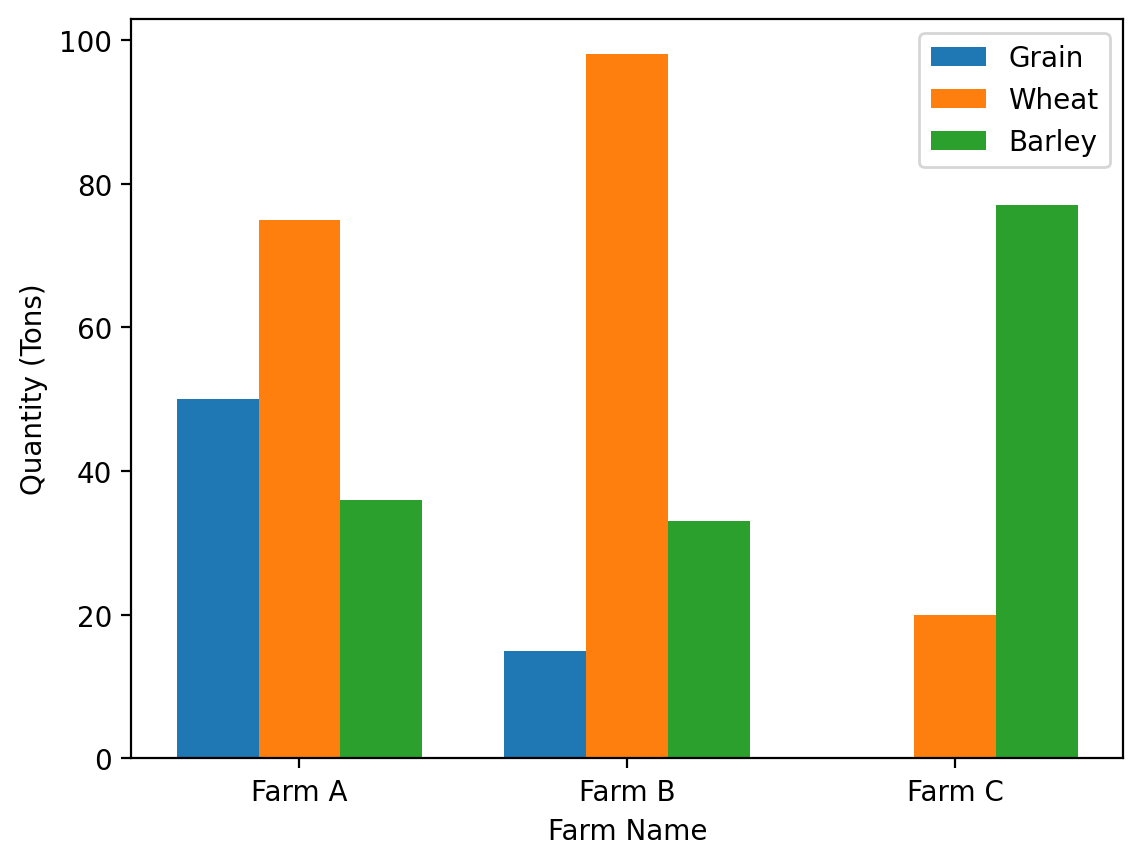

In [13]:
fig, ax = plt.subplots()

num_columns = farm_data.shape[0] # Number of bars per group
num_rows = farm_data.shape[1] # Number of groups

x_values = np.arange(num_rows)

bar_width = 1 / (num_columns + 1)  # width of the bars. To ensure a gap between groups, this could be 1 / (N+1) where N is the number of bars per group
column_count = 0 # Count of how many sets of bars have been plotted so far

for crop_name, farm_crop_yields in farm_data.items():
    offset = bar_width * column_count # Offset from the x axis value for the group to the place where the bar will be centered
    ax.bar(x_values + offset, farm_crop_yields.values, width=bar_width, label=crop_name)
    column_count += 1

tick_locations = x_values + (1 - offset) / 2  # Place the ticks at the center of the groups of bars
ax.set_xticks(tick_locations)
ax.set_xticklabels(farm_data.index)

ax.legend()
ax.set_xlabel('Farm Name')
ax.set_ylabel('Quantity (Tons)')

To create these grouped bar plots, we need to tell matplotlib where we want each of the bars to go along the x-axis and spread them out based on how many bars we will plot per group. Let's look at this on an iteration-by-iteration basis to show how this works. There are four key quantities:

1. The width of the bars to plot
2. The iteration that we're currently on, starting at zero and walking through each item in the group (e.g. grain, wheat, barley, in our last example)
3. The offset for where to center the bar along the x axis (assuming a vertical bar plot)
4. The x values of the offset bars. For example, if the x values are [0,1,2] and we include an offset of 0.5, we'll plot the centers of those bars at [0.5, 1.5, 2.5]

The figure below shows step-by-step how these grouped bar plots are created.

![Making a grouped bar chart](img/5.1-grouped-bar.png)

Stacked and grouped bar plots are common tools to use when comparing values and will be a regular tool in your growing toolbox.

## Pie charts

Pie charts are, thankfully, quite easy to make in matplotlib. Let's revisit our example of the total grain, wheat, and barley across the three farms and plot the percentage of each that is present. Recall here that the index of the `total` series is the names of the types of crops.

([<matplotlib.patches.Wedge at 0x11f466fc0>,
 [Text(0.962450074274041, 0.5326254354890437, 'Grain'),
  Text(-0.8889120235622774, 0.647947076825274, 'Wheat'),
  Text(0.46401849921153376, -0.9973398780703978, 'Barley')])

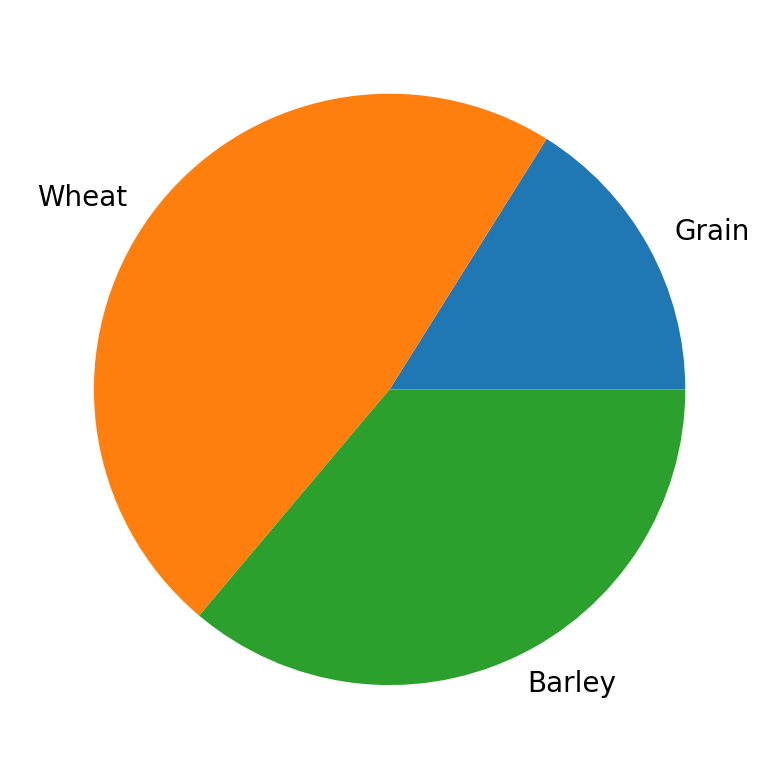

In [14]:
fig, ax = plt.subplots()

ax.pie(total, labels=total.index)

Oftentimes we want to see the percentages of each piece of the pie, and we can add that in using the `autopct` keyword argument, which plots text representing the percent of each of the pieces of the pie using whatever string plotting function is provided. In this case, we create a lambda function that returns the percent to 1 decimal place and has a percentage sign at the end.

([<matplotlib.patches.Wedge at 0x129166060>,
 [Text(0.962450074274041, 0.5326254354890437, 'Grain'),
  Text(-0.8889120235622774, 0.647947076825274, 'Wheat'),
  Text(0.46401849921153376, -0.9973398780703978, 'Barley')],
 [Text(0.5249727677858405, 0.29052296481220563, '16.1%'),
  Text(-0.48486110376124214, 0.3534256782683312, '47.8%'),
  Text(0.2531009995699275, -0.5440035698565806, '36.1%')])

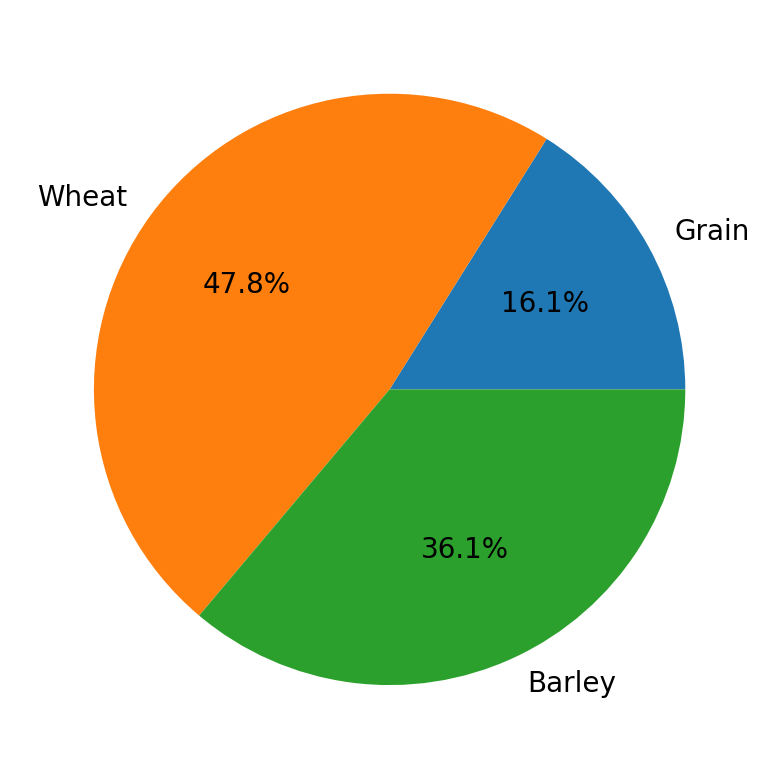

In [38]:
fig, ax = plt.subplots()

ax.pie(total, labels=total.index, autopct=lambda x: f'{x:.1f}%')

Maybe we want the name of the grain inside the plot and the percent outside the plot. We can adjust this with two keyword arguments: `pctdistance`, which is the relative distance along the radius of the pie where the text created by autopct is located. The edge of the pie chart is a distance of 1, so anything larger than 1 is outside the chart and anything smaller than 1 is inside the chart. There's an analogous keyword argument for the label, `labeldistance`. Let's adjust those to see how we can swap the text locations.

([<matplotlib.patches.Wedge at 0x1292180e0>,
 [Text(0.4374773064882004, 0.24210247067683802, 'Grain'),
  Text(-0.40405091980103514, 0.2945213985569427, 'Wheat'),
  Text(0.21091749964160625, -0.45333630821381715, 'Barley')],
 [Text(1.049945535571681, 0.5810459296244113, '16.1%'),
  Text(-0.9697222075224843, 0.7068513565366624, '47.8%'),
  Text(0.506201999139855, -1.0880071397131612, '36.1%')])

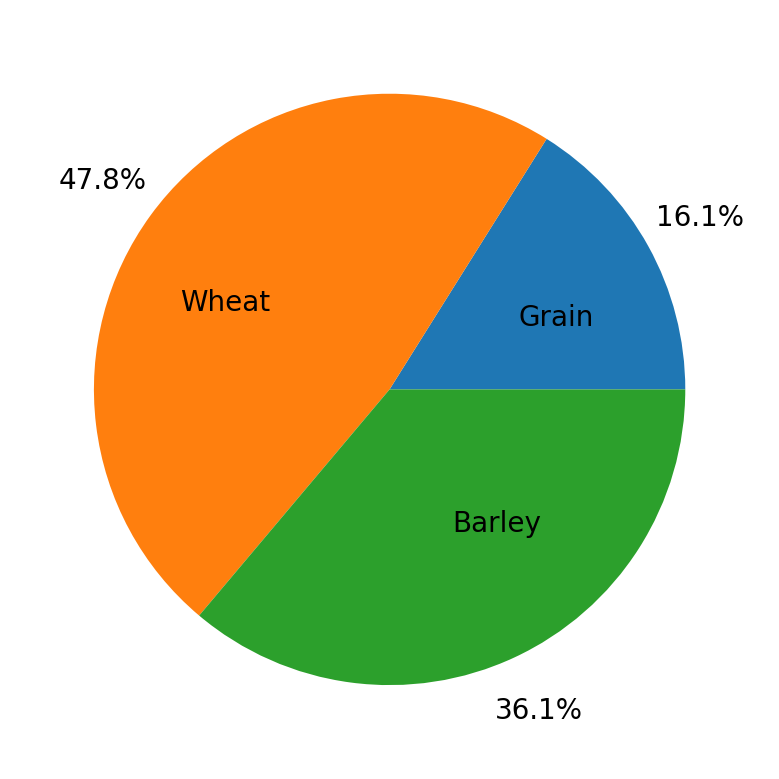

In [41]:
fig, ax = plt.subplots()

ax.pie(total, labels=total.index, autopct=lambda x: f'{x:.1f}%',
       pctdistance=1.2,
       labeldistance=0.5)

But what if we wanted to change the colors of the text? This requires a bit more knowledge of the inner workings of matplotlib, but we can see how this works by looking at the parameters that our output from the `pie()` method. The three returns from this method are an array of the patches that form the pie slices themselves, an array of the text objects that are the labels, and an array of the text objects that are the percentage text. To change the color of any of these we just need to iterate over them and set their color to what we'd like. Let's set the color of all of the label names to white:

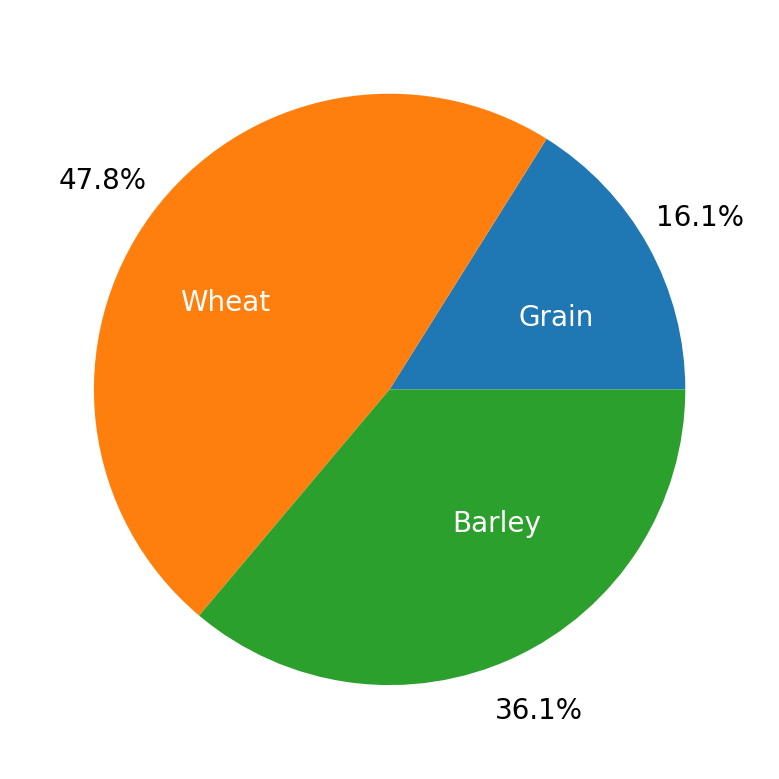

In [42]:
fig, ax = plt.subplots()

patches,text_label,text_percent = ax.pie(total, labels=total.index, autopct=lambda x: f'{x:.1f}%', pctdistance=1.2, labeldistance=0.5)

for text in text_label:
    text.set_color('white')

## Heat maps

Sometimes we want to visualize tabular data, but there are too many entries for bar plots or line plots and a table itself would not easily reveal patterns. In this case, a heat map can be an effective tool for visualizing your data. Imagine that we have a 2D array represents student grades where the x-axis represents the grades (A-F) and the y labels each represent a different student with student ID numbers. Each entry is the percentage of grades the student received of that letter grade (so the sum across the columns is 100 for each row). Let's start by displaying our data first:

In [54]:
import matplotlib.pyplot as plt
import numpy as np

letter_grades = ["A", "B", "C", "D", "F"]
student_ids = ["131", "132", "133", "134"]

grades = np.array([ [20, 30, 40, 10, 0],
                    [0, 20, 60, 0, 20],
                    [20, 30, 30, 20, 0],
                    [0, 10, 10, 30, 50]])
grades

array([[20, 30, 40, 10,  0],
       [ 0, 20, 60,  0, 20],
       [20, 30, 30, 20,  0],
       [ 0, 10, 10, 30, 50]])

Now, let's plot the heatmap. We can do this using the `imshow()` method which plots each entry in the 2D array as a color where the color varies based on the magnitude of the entry. Let's plot the array and set the tick labels to match our data.

Text(0.5, 1.0, 'Student Grade Distributions')

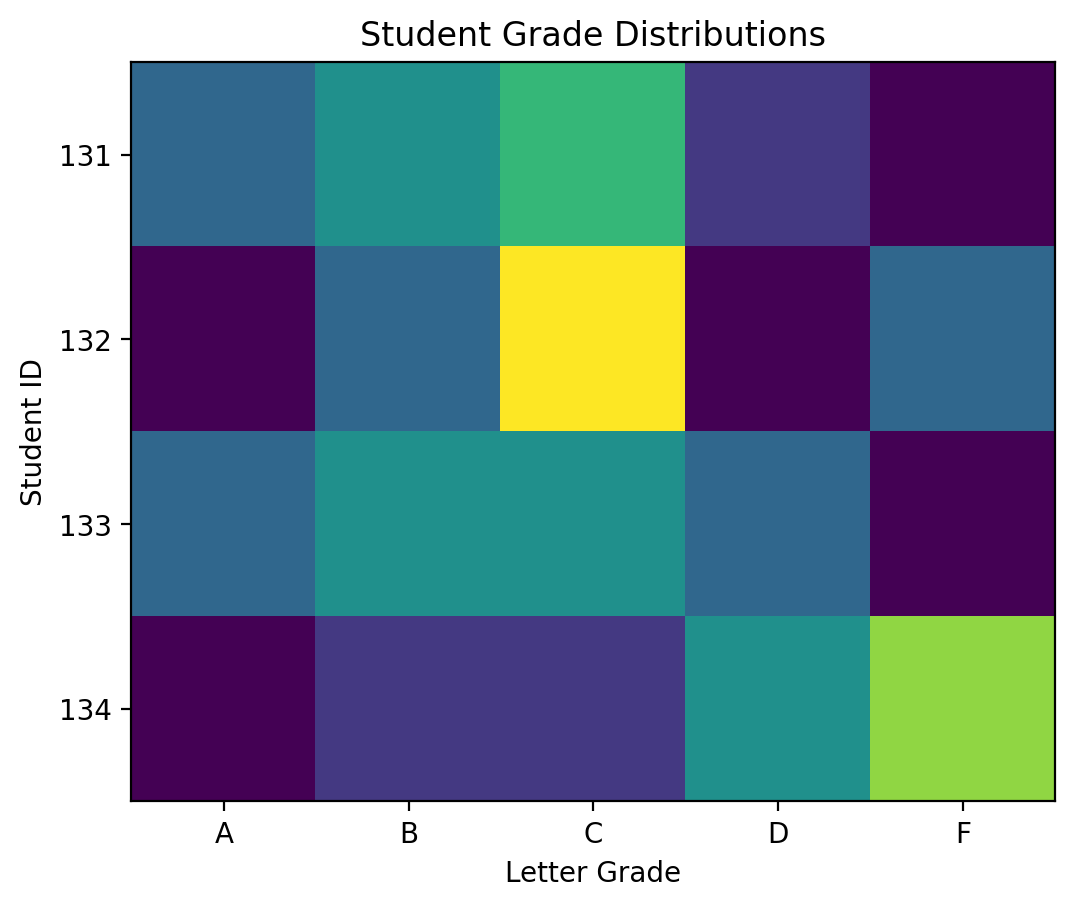

In [55]:
fig, ax = plt.subplots()

heatmap = ax.imshow(grades)

ax.set_xticks(np.arange(len(letter_grades)))
ax.set_xticklabels(letter_grades)
ax.set_yticks(np.arange(len(student_ids)))
ax.set_yticklabels(student_ids)

ax.set_xlabel("Letter Grade")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")

The problem we have here is that we don't know what the colors represent in terms of the numbers of grade. Let's add a color bar that provides that information. A colorbar is a new set of axes that displays the color. We apply the `colorbar` method to the figure and specify the image that we're plotting from which `colorbar` determines what each color represents in terms of values in the array and then the axes object adjacent to which the colorbar will be placed.

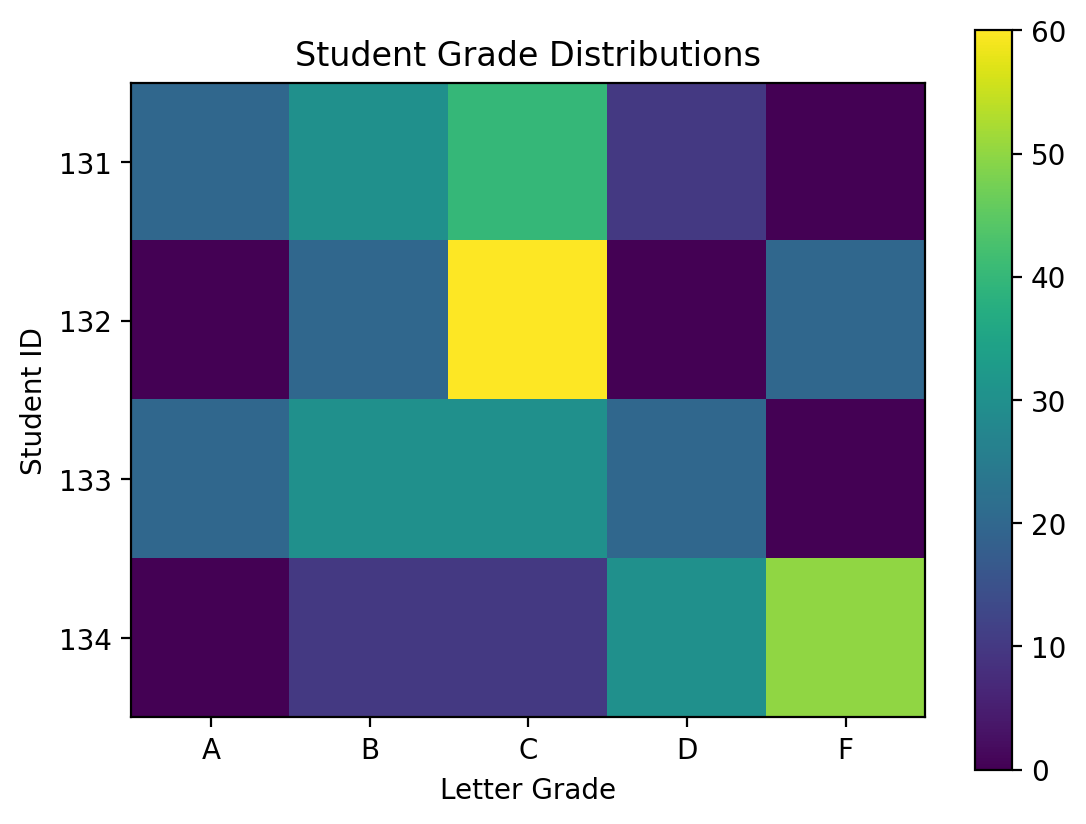

In [56]:
fig, ax = plt.subplots()

heatmap = ax.imshow(grades)

ax.set_xticks(np.arange(len(letter_grades)))
ax.set_xticklabels(letter_grades)
ax.set_yticks(np.arange(len(student_ids)))
ax.set_yticklabels(student_ids)

ax.set_xlabel("Letter Grade")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")

fig.colorbar(heatmap, ax=ax)

Next, let's label the colorbar axis so we clearly communicate what it means.

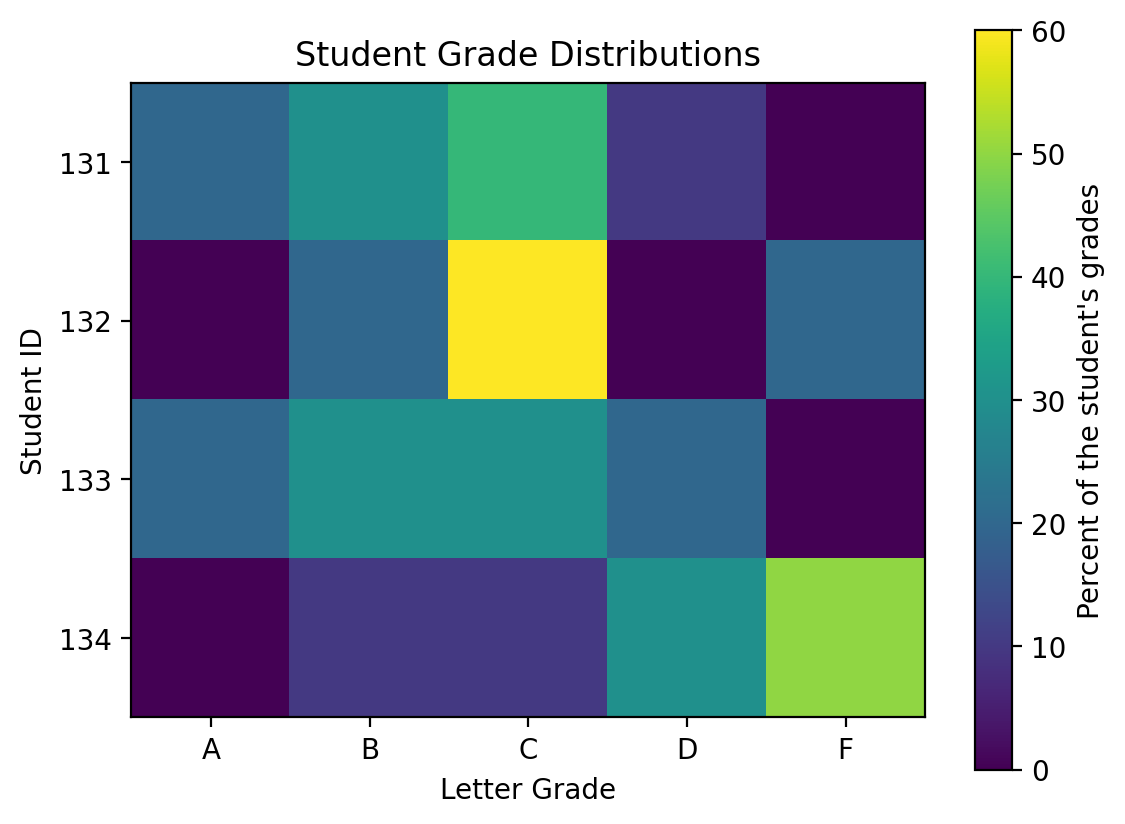

In [57]:
fig, ax = plt.subplots()

heatmap = ax.imshow(grades)

ax.set_xticks(np.arange(len(letter_grades)))
ax.set_xticklabels(letter_grades)
ax.set_yticks(np.arange(len(student_ids)))
ax.set_yticklabels(student_ids)

ax.set_xlabel("Letter Grade")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")

fig.colorbar(heatmap, ax=ax, label='Percent of the student\'s grades')

Sometimes, it's even clearer, yet, to directly write the values of each entry in the image. To do this, we can simply plot text at the center of each of the grid cells. We'll make them white so they're more easily read.

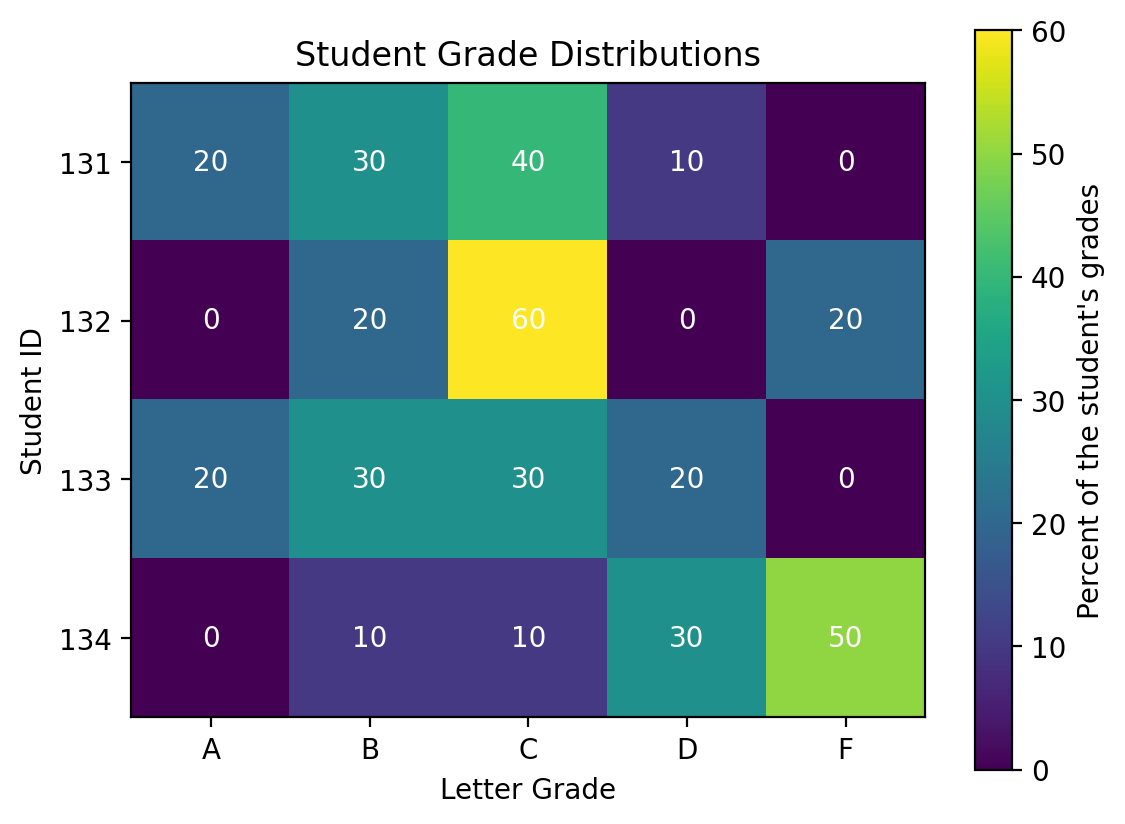

In [58]:
fig, ax = plt.subplots()

heatmap = ax.imshow(grades)

ax.set_xticks(np.arange(len(letter_grades)))
ax.set_xticklabels(letter_grades)
ax.set_yticks(np.arange(len(student_ids)))
ax.set_yticklabels(student_ids)

ax.set_xlabel("Letter Grade")
ax.set_ylabel("Student ID")
ax.set_title("Student Grade Distributions")

fig.colorbar(heatmap, ax=ax, label='Percent of the student\'s grades')

# Plot the text labels for each grid cell
for y in range(len(student_ids)):
    for x in range(len(letter_grades)):
        ax.text(x, y, grades[y,x],
                horizontalalignment="center", 
                verticalalignment="center", 
                color="w")

There's a lot we can do with heatmaps and we'll return to these later in the course as we explore two-dimensional histograms.

At this point, though, we've created many plots. We typically want to package these in reports or presentations and to do so, we need to save our figures to file. Let's learn how to do that next!